In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='Malgun Gothic')

In [3]:
df1 = pd.read_csv('./data/Data03.csv')
df1.head(2)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


# 다변수

* x : 연속 / y : 연속
    - 산점도 / 회귀선 / 상관분석

<AxesSubplot:xlabel='age', ylabel='Mileage'>

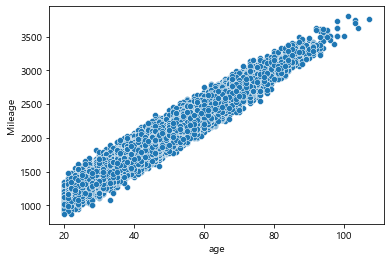

In [4]:
# 산점도 분석

sns.scatterplot(data=df1, x= 'age', y='Mileage')

<AxesSubplot:xlabel='age', ylabel='Mileage'>

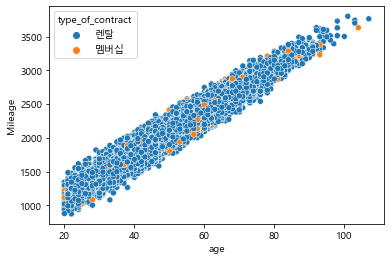

In [5]:
sns.scatterplot(data=df1, x= 'age', y='Mileage',hue='type_of_contract')

<AxesSubplot:xlabel='age', ylabel='Mileage'>

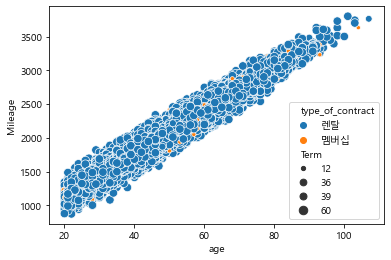

In [8]:
sns.scatterplot(data=df1, x= 'age', y='Mileage',hue='type_of_contract',size='Term')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

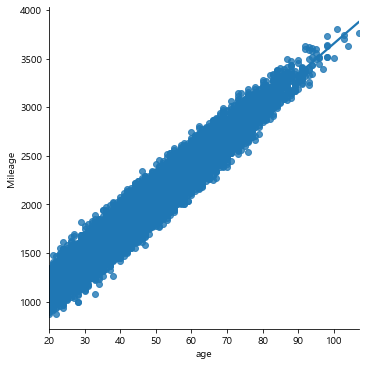

In [9]:
# 회귀선 분석(선형 회귀식)  - 점들을 대표하는 식 

sns.lmplot(data=df1, x='age', y='Mileage')

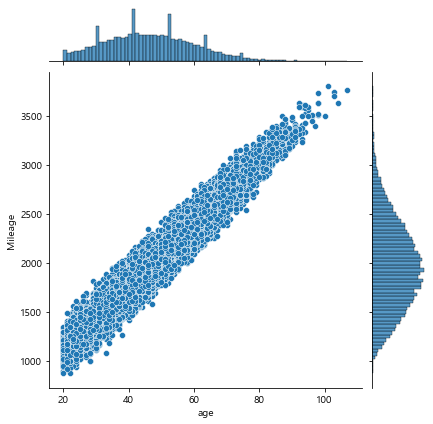

In [11]:
# jointplot - 1. 각각의 히스토그램을 출력하고  2. 둘사이의 산점도를 표현한다.

sns.jointplot(data=df1, x= 'age', y= 'Mileage')

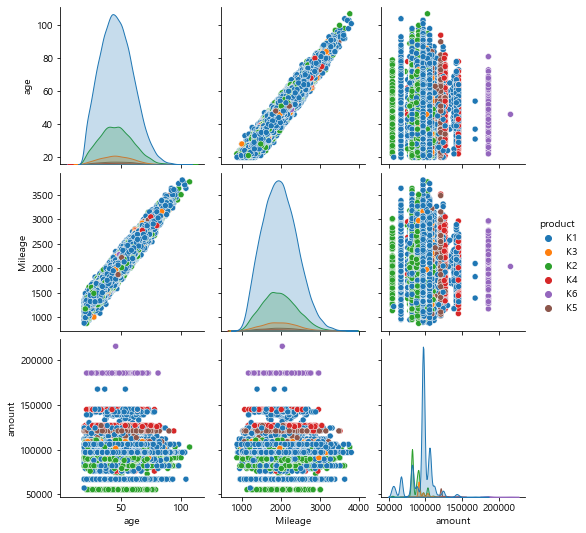

In [12]:
# 상관 분석 (pairplot)

sns.pairplot(df1[['age','Mileage','amount','product']],hue = 'product')

* x : 범주형 / y : 연속형
    - Barplot / Boxplot

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

In [25]:
# 피벗테이블 생성
p1 = pd.pivot_table(data= df1, index= 'channel', values= 'amount', aggfunc='sum')

# 피벗테이블 정렬
p1.sort_values(by='amount',ascending=False).head(5)
top_list = p1.sort_values(by='amount',ascending=False).head(5).index.tolist()

<AxesSubplot:xlabel='channel', ylabel='amount'>

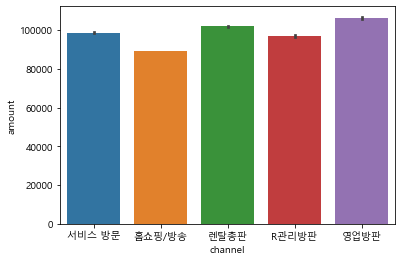

In [26]:
sns.barplot(data=df1, x= 'channel', y= 'amount', order=top_list)

<AxesSubplot:xlabel='channel', ylabel='amount'>

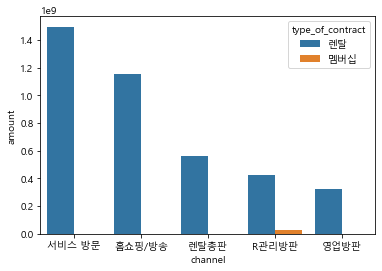

In [32]:
# estimator 인자는 통계기능을 수행한다.
# confidential interval(신뢰구간)은 검은색 점을 나타낸다.

sns.barplot(data=df1, x= 'channel', y= 'amount', order=top_list,
            estimator= sum, ci=None, hue='type_of_contract')

<AxesSubplot:xlabel='channel', ylabel='amount'>

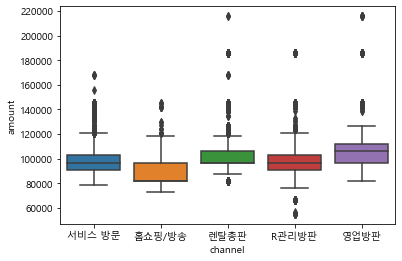

In [33]:
# 특정 범주형에 대해서 분포를 확인할 때 boxplot을 사용

# 양쪽 팔을 벗어난 데이터를 이상치로 볼 수 있다
# box는 데이터의 50%가 몰려있는 구간이라고 볼 수 있다.

sns.boxplot(data=df1, x= 'channel', y= 'amount', order= top_list)

In [34]:
# %matplotlib inline - 출력한 값이 바로 output으로 출력한다.
# %matplotlib tk - 새창에서 출력한 결과를 보여준다